# Болезнь Альцгеймера (БА)

## Описание болезни

Болезнь Альцгеймера (БА) представляет собой нейродегенеративное заболевание с невыясненными причинами и патогенезом, которое в первую очередь поражает пожилых людей и является наиболее частой причиной деменции. Самым ранним клиническим проявлением БА является избирательное ухудшение памяти, и хотя для облегчения некоторых симптомов существуют методы лечения, в настоящее время лекарство не существует. Визуализация головного мозга с помощью магнитно-резонансной томографии (МРТ) используется для оценки пациентов с подозрением на болезнь Альцгеймера. Результаты МРТ включают как локальное, так и генерализованное сморщивание мозговой ткани. В некоторых исследованиях было высказано предположение, что признаки МРТ могут предсказывать скорость снижения БА и могут назначать терапию в будущем.

## Описание датасета

* Набор данных состоит из данных МРТ 150 человек в возрасте от 60 до 96 лет.
* Каждый человек сканировался не менее одного раза.
* Все правши.
* 72 субъекта были сгруппированы как «Без умственного расстройства» на протяжении всего исследования.
* 64 субъекта были сгруппированы как «Деменция» во время их первых посещений и оставались таковыми на протяжении всего исследования.
* 14 испытуемых были отнесены к группе «Без умственного расстройства» во время их первоначального посещения и впоследствии были охарактеризованы как «Безумные» при более позднем посещении. Они подпадают под категорию «Конвертированные».

### Описание признаков

| Название | Описание                             |
|----------|--------------------------------------|
| EDUC     | Годы обучения                        |
| SES      | Социально-экономический статус       |
| MMSE     | Мини-тест психического состояния     |
| CDR      | Клинический рейтинг деменции         |
| eTIV     | Расчетный общий внутричерепной объем |
| nWBV     | Нормализация объема всего мозга      |
| ASF      | Коэффициент масштабирования Атласа   |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set()

df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


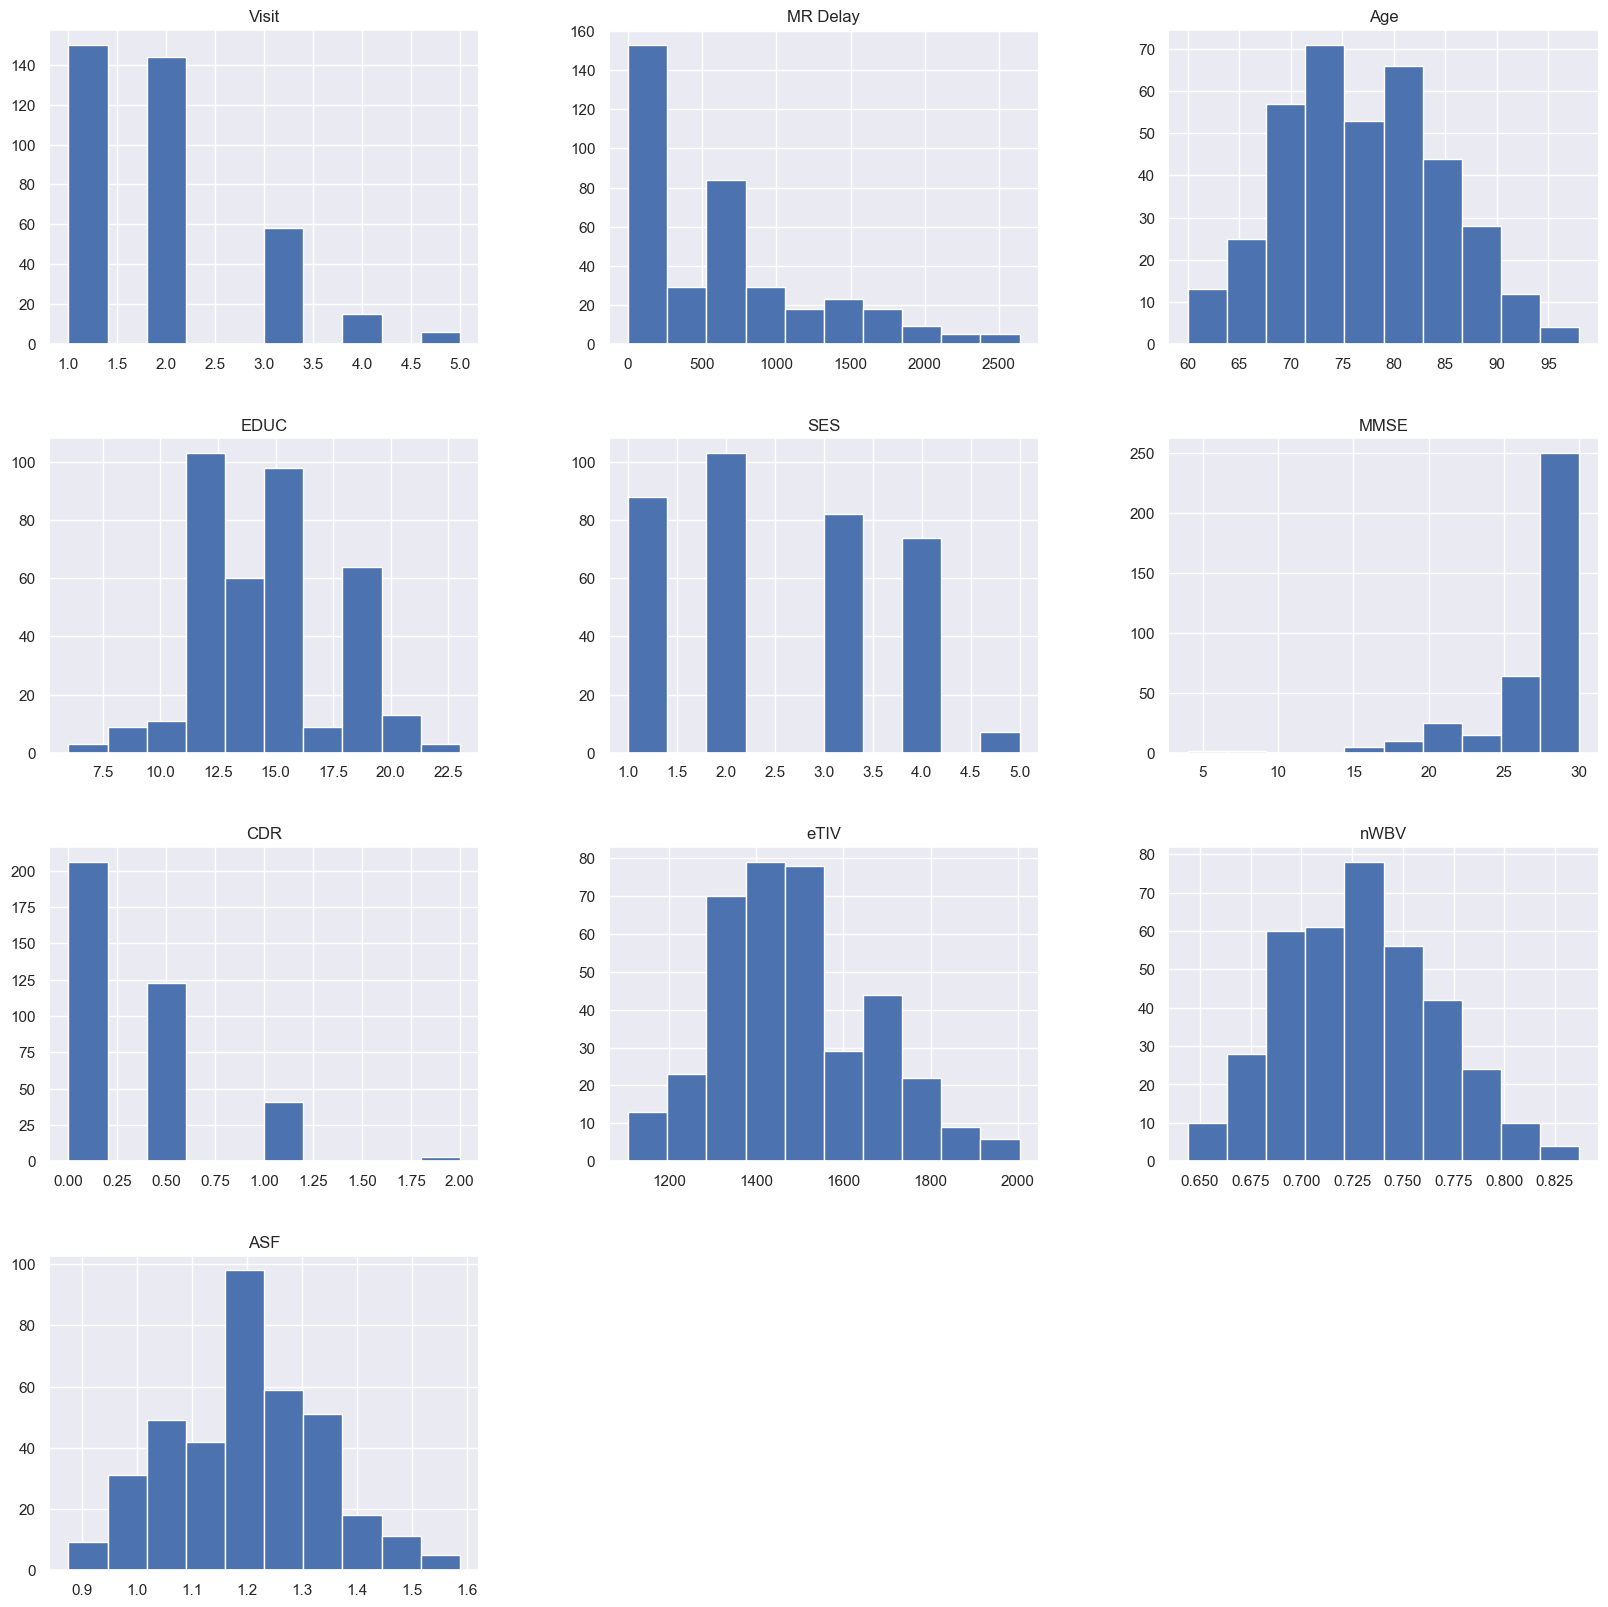

In [2]:
df.hist(figsize=(20,20))
plt.show();

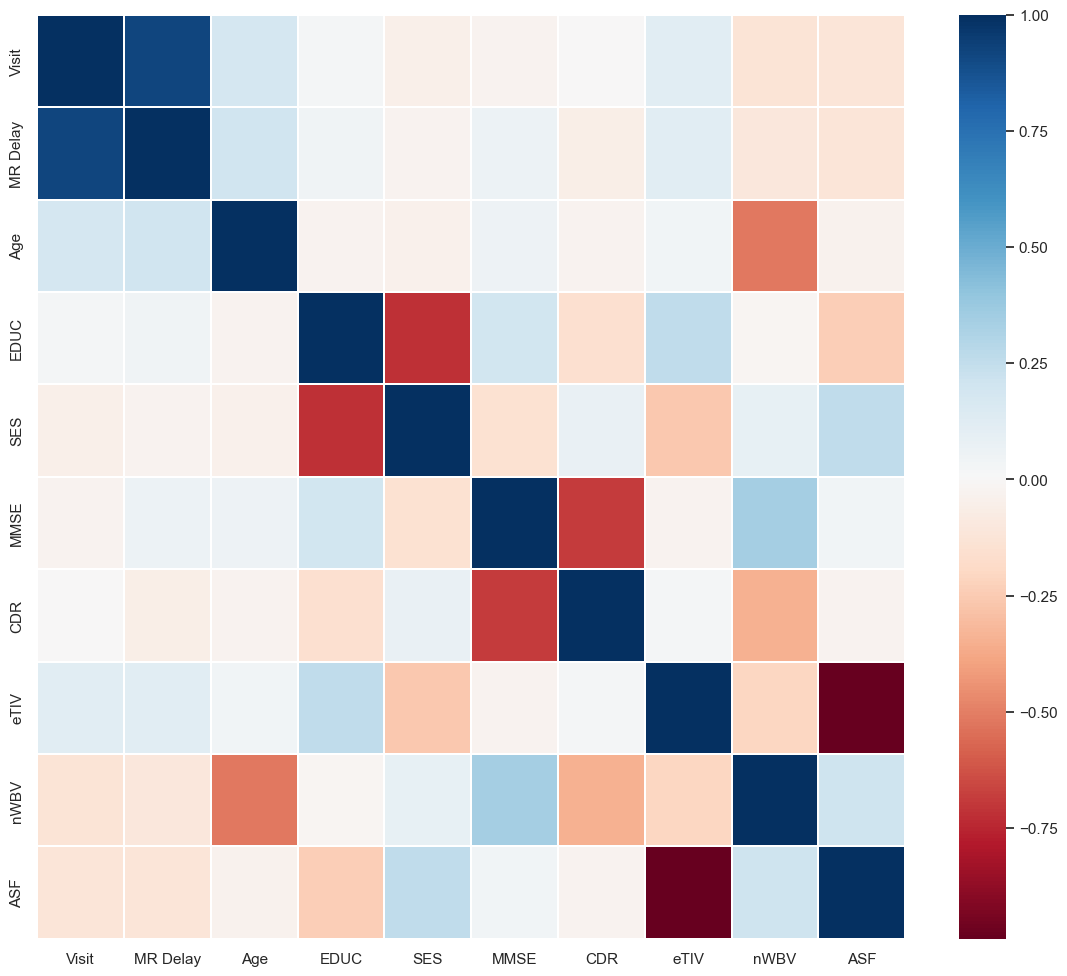

In [3]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(14,12))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu")

In [4]:
df = df.loc[df['Visit']==1]
df = df.reset_index(drop=True)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1)

In [5]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

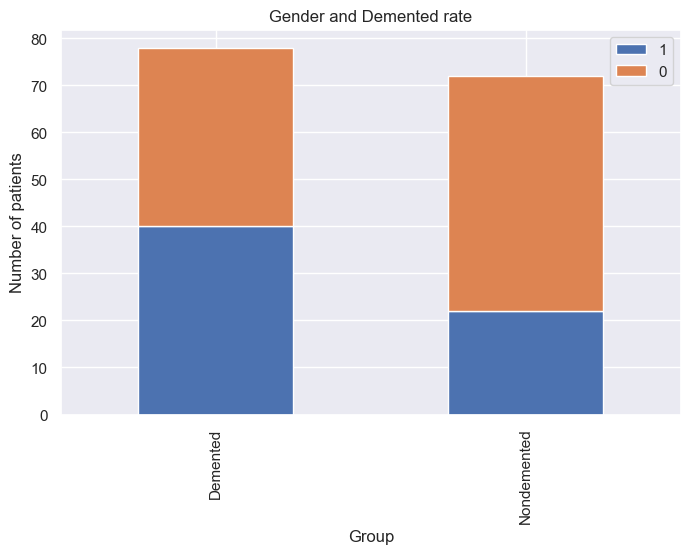

In [6]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.3, 30.0)

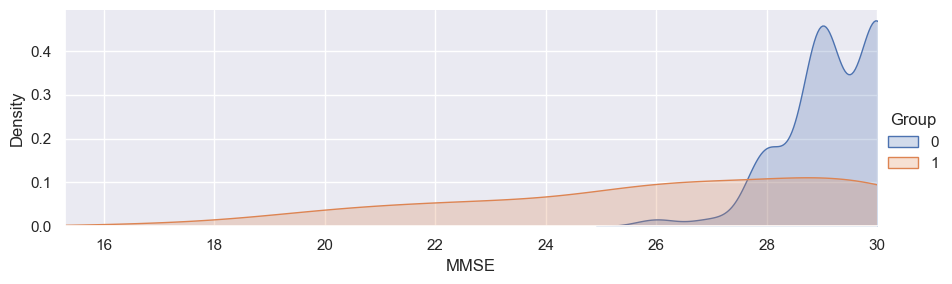

In [7]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

Диаграмма показывает, что группа без деменции получила гораздо более высокие баллы по шкале MMSE, чем группа с деменцией.

(0.6, 0.9)

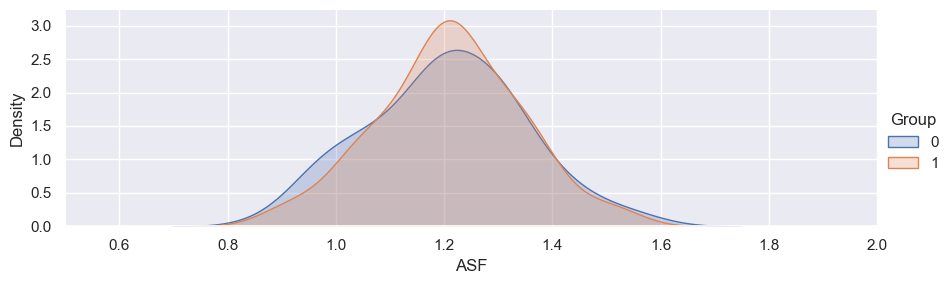

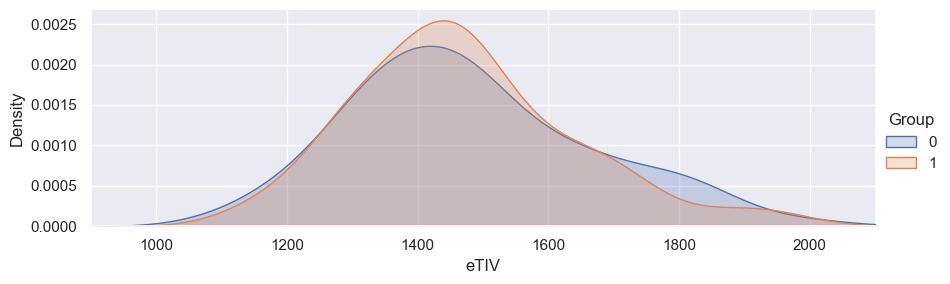

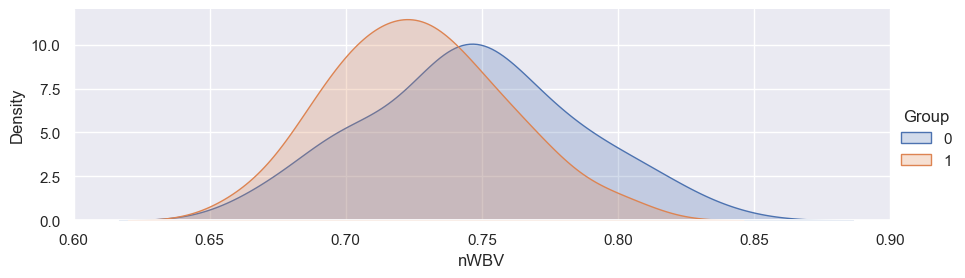

In [8]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

Диаграмма показывает, что группа без деменции имеет более высокий коэффициент объема мозга, чем группа с деменцией. Предполагается, что это связано с тем, что болезни влияют на мозг, уменьшая его ткани.

(50.0, 100.0)

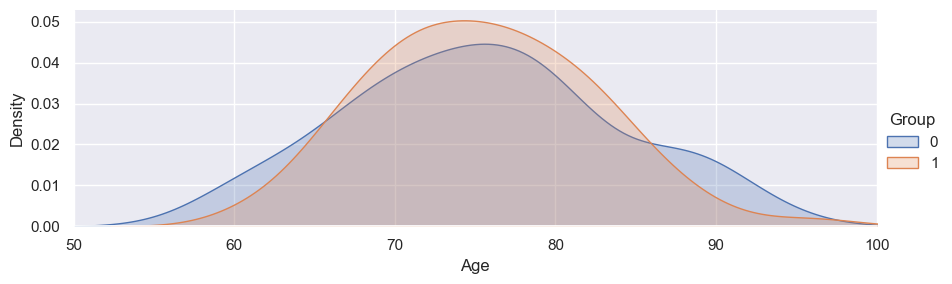

In [9]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

В группе пациентов с деменцией наблюдается более высокая концентрация людей в возрасте 70–80 лет, чем среди пациентов без деменции. Предполагается, что пациенты, которые страдали от такого заболевания, имеют более низкую выживаемость, так что есть несколько 90-летних.

(0.0, 0.16)

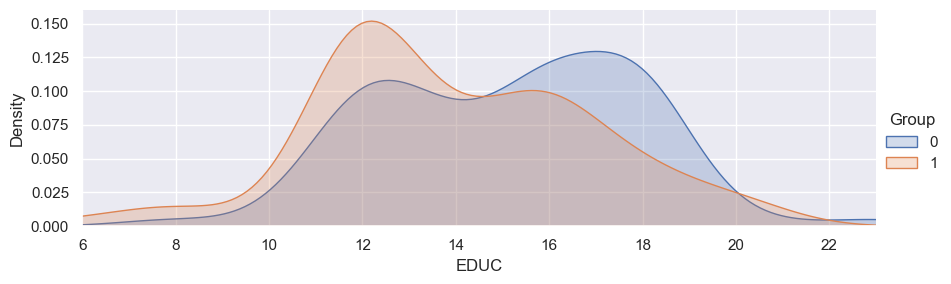

In [10]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

* Мужчины чаще страдают деменцией, болезнью Альцгеймера, чем женщины.
* Пациенты с деменцией были менее образованны с точки зрения количества лет обучения.
* Группа без деменции имеет больший объем мозга, чем группа с деменцией.
* Более высокая концентрация 70-80 лет в группе с деменцией, чем у пациентов без деменции.

In [11]:
pd.isnull(df).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [12]:
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [13]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

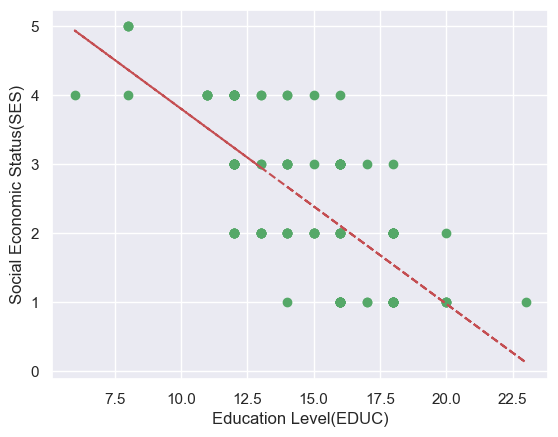

In [14]:
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [15]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [16]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [17]:
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [19]:
Y = df['Group'].values
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

In [20]:
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [22]:
Y = df_dropna['Group'].values
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

In [23]:
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [26]:
best_score = 0
kfolds=5

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']:
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter)
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameter_c = c_paramter
                best_parameter_gamma = gamma_paramter
                best_parameter_k = k_parameter

In [27]:
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)

cfm=confusion_matrix(Y_test,PredictedOutput)

print('Confusion Matrix: \n', cfm, '\n')

print("Лучшие показатель качества модели:", best_score)
print("Лучшее значение C : ", best_parameter_c)
print("Лучшее значение Gamma: ", best_parameter_gamma)
print("Лучшее значение Kernel: ", best_parameter_k)

print("Accuracy:", test_score)
print("Recall:", test_recall)

Confusion Matrix: 
 [[15  1]
 [ 5  9]] 

Лучшие показатель качества модели: 0.775
Лучшее значение C :  100
Лучшее значение Gamma:  0.1
Лучшее значение Kernel:  rbf
Accuracy: 0.8
Recall: 0.6428571428571429
